# The Best Hour of the Day to Post on Hacker News: Analyzing the Posts' Data

This project aims to analyze a dataset of submissions to the popular technology site Hacker News. According to [Wikipedia](https://en.wikipedia.org/wiki/Hacker_News), Hacker News is a social news website focused on computer science and entrepreneurship and it is run by Y Combinator, Paul Graham's investment fund and startup incubator.

The dataset we'll use is available [here](https://www.kaggle.com/hacker-news/hacker-news-posts) and has almost 300,000 rows, each row representing a post. It includes the following columns:

   * title: title of the post (self explanatory)

   * url: the url of the item being linked to

   * num_points: the number of upvotes the post received

   * num_comments: the number of comments the post received

   * author: the name of the account that made the post

   * created_at: the date and time the post was made (the time zone is Eastern Time in the US)
 
For this project, we are particulary interested in posts whose titles begin with *Ask HN* and *Show HN*. The first one is used to aks the community a question while the second one is used to show the community something, it could be a project, a product, or just something the author finds interesting enough to share. Our goal is to determine if a post created in a particular moment of the day is more interacted with than posts cretated in other moments. In another words, we are interesd in answering the question: is there a best moment of the day to post on Hacker News?


![](https://www.imagemhost.com.br/images/2020/04/06/HN.png)

## Exploring the Data

We'll begin by importing the libraries we'll use and reading the dataset into a dataframe. Then we'll display the first five rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

hn_data = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv', encoding='utf8')
hn_data.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


The dataframe contains seven columns, but we are most interested in the `num_points`, `num_comments` and `created_at` columns to answer hour question. 

Let's see more information about the data.

In [2]:
hn_data.describe(include='all')

,id,title,url,num_points,num_comments,author,created_at
count,2.931190e+05,293119,279256,293119.000000,293119.000000,293119,293119
unique,NaN,269452,247602,NaN,NaN,51900,215563
top,NaN,Employee benefits at Basecamp,http://www.aioptify.com/topmldmbooks.php?utm_s...,NaN,NaN,jonbaer,4/9/2016 22:40
freq,NaN,15,22,NaN,NaN,2731,11
mean,1.133046e+07,NaN,NaN,15.025324,6.525544,NaN,NaN
std,6.961055e+05,NaN,NaN,58.504103,30.376319,NaN,NaN
min,1.017690e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1.071636e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,1.130303e+07,NaN,NaN,2.000000,0.000000,NaN,NaN
75%,1.193152e+07,NaN,NaN,4.000000,1.000000,NaN,NaN


We can see that the posts receive, in average, 15 points and 6.5 comments.

As we are looking for Ask HN and Show HN posts, we will now create three new dataframes:

* A dataframe for the Ask Hn posts;
* A dataframe for the Show HN posts;
* A dataframe for the other posts.

The we'll see how many posts each dataframe contains.

In [3]:
# Creating the dataframes
ask = hn_data[hn_data['title'].str.lower().str.startswith('ask hn')].copy()
show = hn_data[hn_data['title'].str.lower().str.startswith('show hn')].copy()
other = hn_data[~((hn_data['title'].str.lower().str.startswith('ask hn')) | (hn_data['title'].str.lower().str.startswith('show hn')))].copy()

# Printing the number of rows
print('Number of Ask posts: ', ask.shape[0])
print('Number of Show posts: ', show.shape[0])
print('Number of Other posts: ', other.shape[0])

Number of Ask posts:  9139
Number of Show posts:  10158
Number of Other posts:  273822


We can see that the majority of posts are neither Ask HN nor Show HN.  This does not affect our goal, though.

Let's do some quickly exploring in these dataframes.

In [4]:
ask.describe(include='all')

,id,title,url,num_points,num_comments,author,created_at
count,9.139000e+03,9139,56,9139.000000,9139.000000,9139,9139
unique,NaN,9076,55,NaN,NaN,5432,9028
top,NaN,Ask HN: What are your startup ideas that you a...,http://orchestrahq.com,NaN,NaN,hoodoof,9/1/2016 15:00
freq,NaN,7,2,NaN,NaN,70,4
mean,1.138996e+07,NaN,NaN,11.311741,10.393478,NaN,NaN
std,7.026381e+05,NaN,NaN,41.946308,43.508148,NaN,NaN
min,1.017692e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1.079349e+07,NaN,NaN,1.000000,1.000000,NaN,NaN
50%,1.137689e+07,NaN,NaN,3.000000,2.000000,NaN,NaN
75%,1.202129e+07,NaN,NaN,6.000000,6.000000,NaN,NaN


In [5]:
show.describe(include='all')

,id,title,url,num_points,num_comments,author,created_at
count,1.015800e+04,10158,9787,10158.000000,10158.000000,10158,10158
unique,NaN,9938,9290,NaN,NaN,6478,10029
top,NaN,Show HN: An encoding/decoding tool for Martin ...,https://play.google.com/store/apps/details?id=...,NaN,NaN,bdehaaff,2/11/2016 16:44
freq,NaN,6,9,NaN,NaN,36,3
mean,1.131351e+07,NaN,NaN,14.843572,4.886100,NaN,NaN
std,6.983797e+05,NaN,NaN,51.041850,16.154288,NaN,NaN
min,1.017742e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1.071229e+07,NaN,NaN,2.000000,0.000000,NaN,NaN
50%,1.125589e+07,NaN,NaN,3.000000,0.000000,NaN,NaN
75%,1.193830e+07,NaN,NaN,7.000000,2.000000,NaN,NaN


In [6]:
other.describe(include='all')

,id,title,url,num_points,num_comments,author,created_at
count,2.738220e+05,273822,269413,273822.000000,273822.000000,273822,273822
unique,NaN,250438,238907,NaN,NaN,46531,204980
top,NaN,Employee benefits at Basecamp,http://www.aioptify.com/topmldmbooks.php?utm_s...,NaN,NaN,jonbaer,4/9/2016 22:40
freq,NaN,15,22,NaN,NaN,2731,11
mean,1.132911e+07,NaN,NaN,15.156010,6.457268,NaN,NaN
std,6.957105e+05,NaN,NaN,59.229256,30.237260,NaN,NaN
min,1.017690e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1.071411e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,1.130237e+07,NaN,NaN,2.000000,0.000000,NaN,NaN
75%,1.192843e+07,NaN,NaN,4.000000,0.000000,NaN,NaN


We can see the that Ask HN posts receive about twice as much commentaries than the Show HN posts, but less points, in average. Users seem to be more interested in answer people's questions than interacting with what they want to show. The Other posts receive more than 15 points and 6 comments in average.

## Working with Dates

The `created_at` column contains data about the moment each post was created. As our goal in this project is to determine the best moment of the day to creat a post, we need to extract the value of the hour from this column. For that, in each dataframe, we will:

* Convert the values in the `created_at` column to datetime objects using the `pandas.to_datetime()` function;
* Create the `hour` column and fill it with the values for the hour using the `Series.dt.hour` method;
* Create a series containing the hour column sorted by index, so it's easier to plot.

In [7]:
# Converting the values to datetime
ask['created_at'] = pd.to_datetime(ask['created_at'])
show['created_at'] = pd.to_datetime(show['created_at'])
other['created_at'] = pd.to_datetime(other['created_at'])

# Creating the 'hour' column
ask['hour'] = ask['created_at'].dt.hour.astype(int)
show['hour'] = show['created_at'].dt.hour.astype(int)
other['hour'] = other['created_at'].dt.hour.astype(int)

# Creating series sorted by index
ask_posts = ask['hour'].value_counts().sort_index()
show_posts = show['hour'].value_counts().sort_index()
other_posts = other['hour'].value_counts().sort_index()

Now let's plot these series.

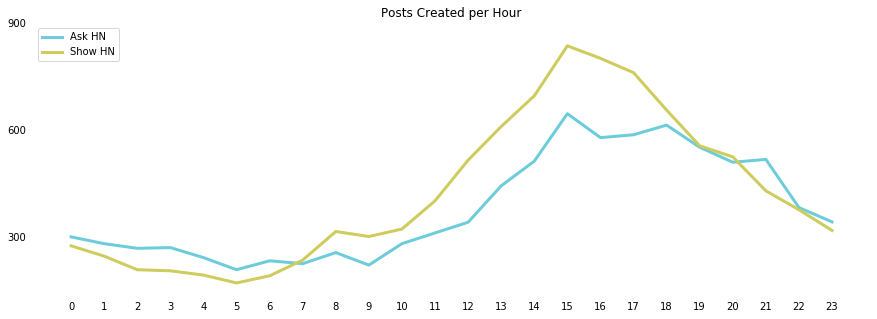

In [8]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ask_posts.index, ask_posts, linewidth=3, color=(109/255, 204/255, 218/255), label='Ask HN')
ax.plot(show_posts.index, show_posts, linewidth=3, color=(205/255, 204/255, 93/255), label='Show HN')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_yticks([300, 600, 900])
ax.set_xticks(ask_posts.index)
ax.set_title('Posts Created per Hour')
ax.legend(loc='upper left')

for kew, spine in ax.spines.items():
    spine.set_visible(False)


plt.show()

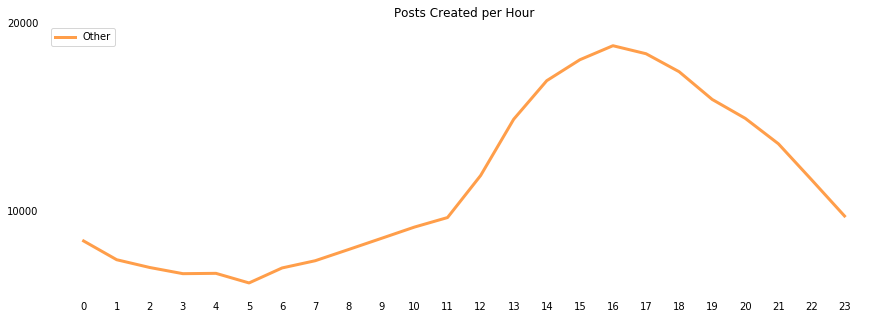

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(other_posts.index, other_posts, linewidth=3, color=(255/255, 158/255, 74/255), label='Other')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_yticks([10000, 20000])
ax.set_xticks(other_posts.index)
ax.set_title('Posts Created per Hour')
ax.legend(loc='upper left')

for kew, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

We can see that the majority of posts are created after 12 o'clock, especially from 14 to 18 o'clock, reaching the summit around from 15 to 16 o´clock.

We had to plot the Other posts separately because the number of posts would compromise the visualization of the Show HN and Ask HN posts.

## Analyzing the Number of Comments and Points

We will now use the `DataFrame.groupby()` method to calculate the average number of points and comments per post created in each hour of the day. We'll do this for each dataframe and asign the results to variables

In [10]:
ask_com = ask.groupby('hour')['num_comments'].mean().sort_index()
ask_pts = ask.groupby('hour')['num_points'].mean().sort_index()

show_com = show.groupby('hour')['num_comments'].mean().sort_index()
show_pts = show.groupby('hour')['num_points'].mean().sort_index()

other_com = other.groupby('hour')['num_comments'].mean().sort_index()
other_pts = other.groupby('hour')['num_points'].mean().sort_index()

And now let's visualize this data and see what we can conclude from it.

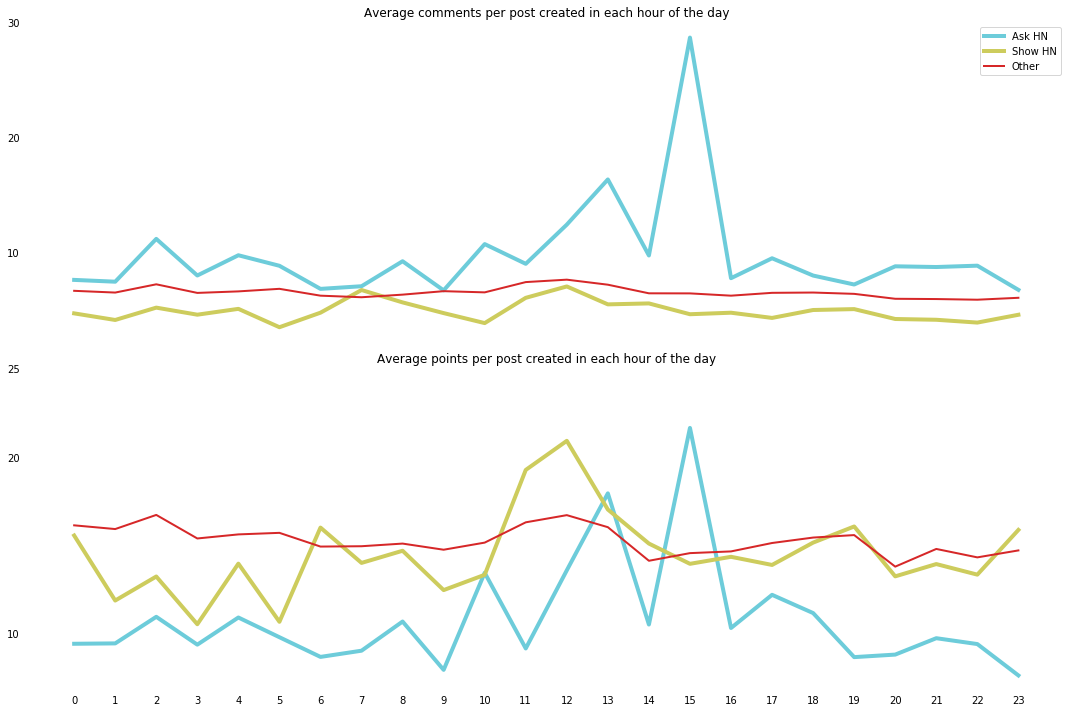

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))

ax1.plot(ask_com.index, ask_com, linewidth=4, color=(109/255, 204/255, 218/255), label='Ask HN')
ax1.plot(show_com.index, show_com, linewidth=4, color=(205/255, 204/255, 93/255), label='Show HN')
ax1.plot(other_com.index, other_com, linewidth=2, color=(214/255, 39/255, 40/255), label='Other')
ax1.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
ax1.set_xticks(ask_com.index)
ax1.set_yticks([10, 20, 30])
ax1.set_title('Average comments per post created in each hour of the day')
ax1.legend(loc='upper right')

for kew, spine in ax1.spines.items():
    spine.set_visible(False)
    
    
ax2.plot(ask_pts.index, ask_pts, linewidth=4, color=(109/255, 204/255, 218/255))
ax2.plot(show_pts.index, show_pts, linewidth=4, color=(205/255, 204/255, 93/255))
ax2.plot(other_pts.index, other_pts, linewidth=2, color=(214/255, 39/255, 40/255))
ax2.tick_params(bottom=False, top=False, left=False, right=False)
ax2.set_xticks(ask_pts.index)
ax2.set_yticks([10, 20, 25])
ax2.set_title('Average points per post created in each hour of the day')

for kew, spine in ax2.spines.items():
    spine.set_visible(False)
    
    
plt.tight_layout()
plt.show()

Aparently, only for Ask HN there's a great difference in the number of comments if the post is created in one specific hour of day. If you have question to the Hacker News community, the best moment by far to submit it is between 15 and 16 o'clock as posts created in this period of time receive almost 30 comments in average. Subimiting a question between 12 and 14 o'clock is also good as these time periods are the second and third more commentend upon.These periods are also the best to creat your Ask HN posts if want to get more points.

If the goal of a submission is to show the community something usign Show HN, the period of time in which the post is created does not make such a great differenece in the numer of comments. However, Show HN posts receive more points when they are created between 10 and 14 o'clock. If we assume that a post with more points is also more visualized, then that is the best period of time to show your ideias to the Hacker News community. Show HN posts created between 12 and 13 o'clock rceive, in average, almost 21 points.

If your post is neither a Ask HN nor a Show HN post, the hour of day in which it is created makes even less difference as the range of average comments goes only from 7.59 comments per post at the best moment for creating a post and 5.84 comments per post at the worst moment to do it. The range of average points only goes from 16.71 to 13.79 points, so the moment you creat this kind of post is not important.

# Conclusion

In this project we went through a dataset containing data from almost 300,000 Hacker News submissions. Our goal was to determine if there's a particular moment of the day in which creating posts would draw more attention to the post.

We are now able to conclude that for Ask HN posts there are definitely better moments of the day to submit a post. As for the Show HN posts, we still can consider that there is at least one best moment of the day to submit something, but the difference is not as big as in the Ask HN posts. For the other posts the difference between posting in a determined moment or in any moment of the day is so small that we should not take it into consideration.

Finally, this data can be useful if you're looking to show a product or a project and wants it to draw some attetion or even if you need to ask a question and it is important that your question receive a lot of answers. For those scenarios you should definitely consider that there are better moments of the day to create your post.
